
# IBM HR ANALYTICS - EMPLOYEE ATTRITION & PERFORMANCE PREDICTION

### Part 1: Data Loading & Initial Exploration

# SECTION 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# SECTION 2: LOAD THE DATASET

In [2]:
# Upload your CSV file in Colab
from google.colab import files
print("📁 Please upload your IBM HR Analytics CSV file...")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(f"\n✅ Dataset '{file_name}' loaded successfully!")
print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


📁 Please upload your IBM HR Analytics CSV file...


Saving IBM HR Analytics.csv to IBM HR Analytics.csv

✅ Dataset 'IBM HR Analytics.csv' loaded successfully!
📊 Dataset Shape: 1470 rows × 35 columns


# SECTION 3: INITIAL DATA EXPLORATION

In [3]:
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)

# Display first few rows
print("\n📋 First 5 Rows:")
print(df.head())

# Display column names and types
print("\n📋 Column Information:")
print(df.info())

# Display basic statistics
print("\n📊 Statistical Summary:")
print(df.describe())

# Check data types
print("\n📋 Data Types:")
print(df.dtypes.value_counts())



DATASET OVERVIEW

📋 First 5 Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                   

# SECTION 4: DATA QUALITY CHECK

In [4]:
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing values
print("\n🔍 Missing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if missing_df.empty:
    print("✅ No missing values found!")
else:
    print(missing_df)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows - will be removed in preprocessing")
else:
    print("✅ No duplicate rows found!")

# Check unique values in key columns
print("\n🔍 Unique Values in Key Columns:")
key_columns = ['Attrition', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'EducationField']
for col in key_columns:
    if col in df.columns:
        print(f"  • {col}: {df[col].nunique()} unique values → {df[col].unique()[:5]}")



DATA QUALITY ASSESSMENT

🔍 Missing Values:
✅ No missing values found!

🔍 Duplicate Rows: 0
✅ No duplicate rows found!

🔍 Unique Values in Key Columns:
  • Attrition: 2 unique values → ['Yes' 'No']
  • Department: 3 unique values → ['Sales' 'Research & Development' 'Human Resources']
  • Gender: 2 unique values → ['Female' 'Male']
  • JobRole: 9 unique values → ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative']
  • MaritalStatus: 3 unique values → ['Single' 'Married' 'Divorced']
  • EducationField: 6 unique values → ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree']


# SECTION 5: TARGET VARIABLE ANALYSIS


TARGET VARIABLE (ATTRITION) ANALYSIS

📊 Attrition Distribution:
  • No (Stayed):  1233 employees (83.88%)
  • Yes (Left):   237 employees (16.12%)


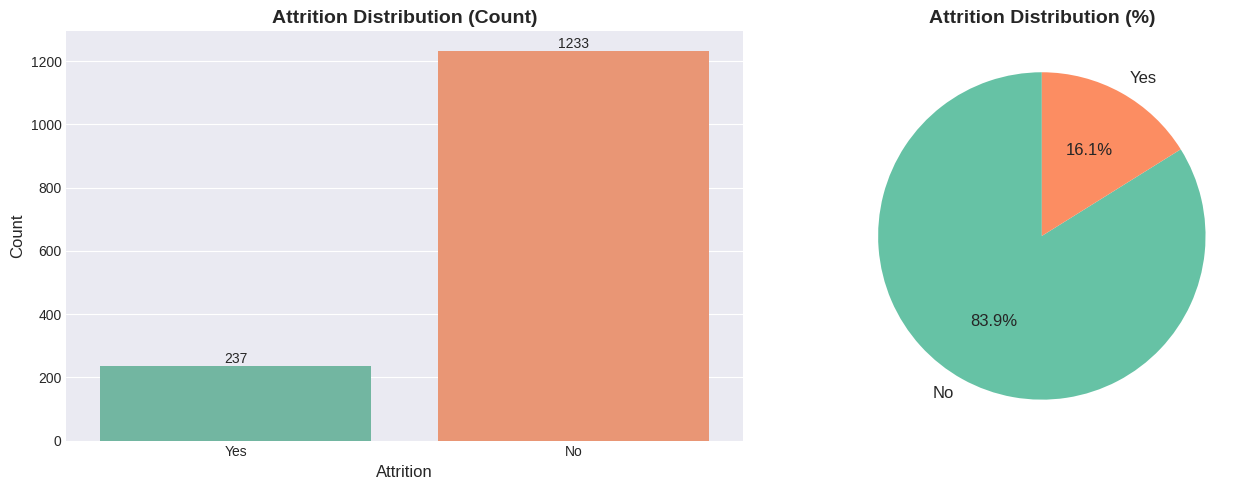


⚖️ Class Imbalance Ratio: 5.20:1 (No:Yes)
⚠️ Significant class imbalance detected - consider using SMOTE or class weights in modeling


In [5]:
print("\n" + "="*80)
print("TARGET VARIABLE (ATTRITION) ANALYSIS")
print("="*80)

# Attrition distribution
attrition_counts = df['Attrition'].value_counts()
attrition_percent = (attrition_counts / len(df)) * 100

print("\n📊 Attrition Distribution:")
print(f"  • No (Stayed):  {attrition_counts['No']} employees ({attrition_percent['No']:.2f}%)")
print(f"  • Yes (Left):   {attrition_counts['Yes']} employees ({attrition_percent['Yes']:.2f}%)")

# Visualize attrition distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Attrition', ax=axes[0], palette='Set2')
axes[0].set_title('Attrition Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
colors = ['#66c2a5', '#fc8d62']
axes[1].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Attrition Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check class imbalance
imbalance_ratio = attrition_counts['No'] / attrition_counts['Yes']
print(f"\n⚖️ Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (No:Yes)")
if imbalance_ratio > 3:
    print("⚠️ Significant class imbalance detected - consider using SMOTE or class weights in modeling")


# SECTION 6: NUMERICAL VS CATEGORICAL FEATURES

In [6]:
print("\n" + "="*80)
print("FEATURE TYPE IDENTIFICATION")
print("="*80)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove EmployeeNumber if present (it's an ID)
if 'EmployeeNumber' in numerical_cols:
    numerical_cols.remove('EmployeeNumber')

print(f"\n📊 Numerical Features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\n📝 Categorical Features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i:2d}. {col} → {df[col].nunique()} categories")



FEATURE TYPE IDENTIFICATION

📊 Numerical Features (25):
   1. Age
   2. DailyRate
   3. DistanceFromHome
   4. Education
   5. EmployeeCount
   6. EnvironmentSatisfaction
   7. HourlyRate
   8. JobInvolvement
   9. JobLevel
  10. JobSatisfaction
  11. MonthlyIncome
  12. MonthlyRate
  13. NumCompaniesWorked
  14. PercentSalaryHike
  15. PerformanceRating
  16. RelationshipSatisfaction
  17. StandardHours
  18. StockOptionLevel
  19. TotalWorkingYears
  20. TrainingTimesLastYear
  21. WorkLifeBalance
  22. YearsAtCompany
  23. YearsInCurrentRole
  24. YearsSinceLastPromotion
  25. YearsWithCurrManager

📝 Categorical Features (9):
   1. Attrition → 2 categories
   2. BusinessTravel → 3 categories
   3. Department → 3 categories
   4. EducationField → 6 categories
   5. Gender → 2 categories
   6. JobRole → 9 categories
   7. MaritalStatus → 3 categories
   8. Over18 → 1 categories
   9. OverTime → 2 categories


# SECTION 7: QUICK INSIGHTS

In [7]:
print("\n" + "="*80)
print("QUICK INSIGHTS")
print("="*80)

# Age statistics
print(f"\n👥 Age Distribution:")
print(f"  • Mean Age: {df['Age'].mean():.1f} years")
print(f"  • Median Age: {df['Age'].median():.1f} years")
print(f"  • Age Range: {df['Age'].min()} - {df['Age'].max()} years")

# Salary statistics
print(f"\n💰 Monthly Income Distribution:")
print(f"  • Mean Salary: ${df['MonthlyIncome'].mean():,.0f}")
print(f"  • Median Salary: ${df['MonthlyIncome'].median():,.0f}")
print(f"  • Salary Range: ${df['MonthlyIncome'].min():,.0f} - ${df['MonthlyIncome'].max():,.0f}")

# Department distribution
print(f"\n🏢 Department Distribution:")
dept_counts = df['Department'].value_counts()
for dept, count in dept_counts.items():
    print(f"  • {dept}: {count} employees ({count/len(df)*100:.1f}%)")

# Job Role distribution
print(f"\n💼 Top 5 Job Roles:")
jobrole_counts = df['JobRole'].value_counts().head()
for role, count in jobrole_counts.items():
    print(f"  • {role}: {count} employees")

# Education Field
print(f"\n🎓 Education Field Distribution:")
edu_counts = df['EducationField'].value_counts()
for field, count in edu_counts.items():
    print(f"  • {field}: {count} employees ({count/len(df)*100:.1f}%)")



QUICK INSIGHTS

👥 Age Distribution:
  • Mean Age: 36.9 years
  • Median Age: 36.0 years
  • Age Range: 18 - 60 years

💰 Monthly Income Distribution:
  • Mean Salary: $6,503
  • Median Salary: $4,919
  • Salary Range: $1,009 - $19,999

🏢 Department Distribution:
  • Research & Development: 961 employees (65.4%)
  • Sales: 446 employees (30.3%)
  • Human Resources: 63 employees (4.3%)

💼 Top 5 Job Roles:
  • Sales Executive: 326 employees
  • Research Scientist: 292 employees
  • Laboratory Technician: 259 employees
  • Manufacturing Director: 145 employees
  • Healthcare Representative: 131 employees

🎓 Education Field Distribution:
  • Life Sciences: 606 employees (41.2%)
  • Medical: 464 employees (31.6%)
  • Marketing: 159 employees (10.8%)
  • Technical Degree: 132 employees (9.0%)
  • Other: 82 employees (5.6%)
  • Human Resources: 27 employees (1.8%)


# SECTION 8: SAVE INITIAL EXPLORATION RESULTS

In [8]:
print("\n" + "="*80)
print("SAVING EXPLORATION RESULTS")
print("="*80)

# Create a summary report
summary = {
    'Total_Rows': df.shape[0],
    'Total_Columns': df.shape[1],
    'Numerical_Features': len(numerical_cols),
    'Categorical_Features': len(categorical_cols),
    'Missing_Values': df.isnull().sum().sum(),
    'Duplicate_Rows': duplicates,
    'Attrition_Rate': f"{attrition_percent['Yes']:.2f}%",
    'Class_Imbalance_Ratio': f"{imbalance_ratio:.2f}:1"
}

summary_df = pd.DataFrame([summary])
print("\n📊 Exploration Summary:")
print(summary_df.T)

# Store key variables for next notebooks
print("\n✅ Exploration Complete!")
print("📌 Key variables stored:")
print(f"  • df: Main DataFrame ({df.shape})")
print(f"  • numerical_cols: {len(numerical_cols)} features")
print(f"  • categorical_cols: {len(categorical_cols)} features")




SAVING EXPLORATION RESULTS

📊 Exploration Summary:
                            0
Total_Rows               1470
Total_Columns              35
Numerical_Features         25
Categorical_Features        9
Missing_Values              0
Duplicate_Rows              0
Attrition_Rate         16.12%
Class_Imbalance_Ratio  5.20:1

✅ Exploration Complete!
📌 Key variables stored:
  • df: Main DataFrame ((1470, 35))
  • numerical_cols: 25 features
  • categorical_cols: 9 features


# IBM HR ANALYTICS - EMPLOYEE ATTRITION & PERFORMANCE PREDICTION

### Part 2: Data Preprocessing & Cleaning

# SECTION 1: IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# SECTION 2: LOAD DATA (from previous notebook or fresh load)

In [10]:
print(f"📊 Working with dataset: {df.shape[0]} rows × {df.shape[1]} columns")

# Create a copy for preprocessing
df_clean = df.copy()
print("✅ Created working copy: df_clean")


📊 Working with dataset: 1470 rows × 35 columns
✅ Created working copy: df_clean


# SECTION 3: HANDLE MISSING VALUES

In [11]:
print("\n" + "="*80)
print("HANDLING MISSING VALUES")
print("="*80)

missing_before = df_clean.isnull().sum().sum()
print(f"\n🔍 Missing values before cleaning: {missing_before}")

if missing_before > 0:
    # Strategy 1: Drop columns with >50% missing
    high_missing = df_clean.columns[df_clean.isnull().sum() / len(df_clean) > 0.5]
    if len(high_missing) > 0:
        print(f"\n⚠️ Dropping columns with >50% missing: {list(high_missing)}")
        df_clean = df_clean.drop(columns=high_missing)

    # Strategy 2: Fill numerical with median
    num_cols_with_missing = df_clean.select_dtypes(include=[np.number]).columns[df_clean.isnull().any()]
    for col in num_cols_with_missing:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"  • {col}: Filled with median ({median_val})")

    # Strategy 3: Fill categorical with mode
    cat_cols_with_missing = df_clean.select_dtypes(include=['object']).columns[df_clean.isnull().any()]
    for col in cat_cols_with_missing:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"  • {col}: Filled with mode ({mode_val})")

    missing_after = df_clean.isnull().sum().sum()
    print(f"\n✅ Missing values after cleaning: {missing_after}")
else:
    print("✅ No missing values to handle!")




HANDLING MISSING VALUES

🔍 Missing values before cleaning: 0
✅ No missing values to handle!


# SECTION 4: HANDLE DUPLICATES

In [12]:
print("\n" + "="*80)
print("HANDLING DUPLICATES")
print("="*80)

duplicates_before = df_clean.duplicated().sum()
print(f"\n🔍 Duplicate rows before: {duplicates_before}")

if duplicates_before > 0:
    df_clean = df_clean.drop_duplicates()
    duplicates_after = df_clean.duplicated().sum()
    print(f"✅ Duplicate rows after: {duplicates_after}")
    print(f"📊 New shape: {df_clean.shape}")
else:
    print("✅ No duplicates found!")




HANDLING DUPLICATES

🔍 Duplicate rows before: 0
✅ No duplicates found!


# SECTION 5: REMOVE IRRELEVANT COLUMNS

In [13]:
print("\n" + "="*80)
print("REMOVING IRRELEVANT COLUMNS")
print("="*80)

# Columns to potentially drop (IDs, constants, etc.)
cols_to_drop = []

# Drop EmployeeNumber (it's just an ID)
if 'EmployeeNumber' in df_clean.columns:
    cols_to_drop.append('EmployeeNumber')

# Drop columns with single unique value (no variance)
constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() == 1]
if constant_cols:
    print(f"\n⚠️ Constant columns (dropping): {constant_cols}")
    cols_to_drop.extend(constant_cols)

if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"\n✅ Dropped {len(cols_to_drop)} columns: {cols_to_drop}")
    print(f"📊 New shape: {df_clean.shape}")
else:
    print("✅ No irrelevant columns to drop!")



REMOVING IRRELEVANT COLUMNS

⚠️ Constant columns (dropping): ['EmployeeCount', 'Over18', 'StandardHours']

✅ Dropped 4 columns: ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
📊 New shape: (1470, 31)


# SECTION 6: ENCODE CATEGORICAL VARIABLES

In [14]:
print("\n" + "="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)

# Separate target variable
target = 'Attrition'
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Encode target (Attrition: Yes=1, No=0)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"\n🎯 Target encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Encoding {len(categorical_cols)} categorical features:")

# Create a copy for encoding
X_encoded = X.copy()

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"  • {col}: {len(le.classes_)} categories encoded")

print("\n✅ All categorical variables encoded!")



ENCODING CATEGORICAL VARIABLES

🎯 Target encoding: {'No': np.int64(0), 'Yes': np.int64(1)}

📝 Encoding 7 categorical features:
  • BusinessTravel: 3 categories encoded
  • Department: 3 categories encoded
  • EducationField: 6 categories encoded
  • Gender: 2 categories encoded
  • JobRole: 9 categories encoded
  • MaritalStatus: 3 categories encoded
  • OverTime: 2 categories encoded

✅ All categorical variables encoded!


# SECTION 7: FEATURE SCALING

In [15]:
print("\n" + "="*80)
print("FEATURE SCALING (STANDARDIZATION)")
print("="*80)

# Get numerical columns
numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Scaling {len(numerical_cols)} numerical features")

# Create a copy for scaling
X_scaled = X_encoded.copy()

# StandardScaler for numerical features
scaler = StandardScaler()
X_scaled[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("✅ Numerical features scaled (mean=0, std=1)")

# Show before/after example
print("\n📊 Scaling Example (Age):")
if 'Age' in X_encoded.columns:
    print(f"  Before scaling: mean={X_encoded['Age'].mean():.2f}, std={X_encoded['Age'].std():.2f}")
    print(f"  After scaling:  mean={X_scaled['Age'].mean():.2f}, std={X_scaled['Age'].std():.2f}")



FEATURE SCALING (STANDARDIZATION)

📊 Scaling 30 numerical features
✅ Numerical features scaled (mean=0, std=1)

📊 Scaling Example (Age):
  Before scaling: mean=36.92, std=9.14
  After scaling:  mean=-0.00, std=1.00


# SECTION 8: TRAIN-TEST SPLIT

In [16]:
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split the data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"\n📊 Split Summary:")
print(f"  • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  • Test set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  • Features:     {X_train.shape[1]}")

# Check class distribution in splits
train_attrition = pd.Series(y_train).value_counts()
test_attrition = pd.Series(y_test).value_counts()

print(f"\n📊 Attrition Distribution:")
print(f"  Training - No: {train_attrition[0]} ({train_attrition[0]/len(y_train)*100:.1f}%), Yes: {train_attrition[1]} ({train_attrition[1]/len(y_train)*100:.1f}%)")
print(f"  Test     - No: {test_attrition[0]} ({test_attrition[0]/len(y_test)*100:.1f}%), Yes: {test_attrition[1]} ({test_attrition[1]/len(y_test)*100:.1f}%)")



TRAIN-TEST SPLIT

📊 Split Summary:
  • Training set: 1176 samples (80.0%)
  • Test set:     294 samples (20.0%)
  • Features:     30

📊 Attrition Distribution:
  Training - No: 986 (83.8%), Yes: 190 (16.2%)
  Test     - No: 247 (84.0%), Yes: 47 (16.0%)


# SECTION 9: SAVE PREPROCESSED DATA

In [17]:
print("\n" + "="*80)
print("SAVING PREPROCESSED DATA")
print("="*80)

# Combine X and y for saving
df_processed = X_encoded.copy()
df_processed['Attrition'] = y_encoded

# Save to CSV
output_file = 'hr_analytics_preprocessed.csv'
df_processed.to_csv(output_file, index=False)
print(f"✅ Saved preprocessed data to: {output_file}")

# Also save the original encoded version (before scaling) for Power BI
df_for_powerbi = df_clean.copy()
df_for_powerbi['Attrition_Encoded'] = y_encoded
df_for_powerbi.to_csv('hr_analytics_for_powerbi.csv', index=False)
print(f"✅ Saved Power BI version to: hr_analytics_for_powerbi.csv")



SAVING PREPROCESSED DATA
✅ Saved preprocessed data to: hr_analytics_preprocessed.csv
✅ Saved Power BI version to: hr_analytics_for_powerbi.csv


# SECTION 10: PREPROCESSING SUMMARY

In [18]:
print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)

summary = {
    'Original_Shape': df.shape,
    'Cleaned_Shape': df_clean.shape,
    'Rows_Removed': df.shape[0] - df_clean.shape[0],
    'Columns_Removed': df.shape[1] - df_clean.shape[1],
    'Categorical_Encoded': len(categorical_cols),
    'Numerical_Scaled': len(numerical_cols),
    'Training_Samples': X_train.shape[0],
    'Test_Samples': X_test.shape[0],
    'Total_Features': X_train.shape[1]
}

for key, value in summary.items():
    print(f"  • {key.replace('_', ' ')}: {value}")

print("\n✅ Preprocessing Complete!")
print("\n🎯 Ready for:")
print("  1. Exploratory Data Analysis (EDA)")
print("  2. Feature Engineering")
print("  3. Machine Learning Modeling")

# Store important objects for next notebooks
print("\n📌 Objects available for next notebooks:")
print("  • X_train, X_test: Scaled features")
print("  • y_train, y_test: Encoded target")
print("  • df_processed: Processed DataFrame")
print("  • label_encoders: Encoding mappings")
print("  • scaler: Fitted StandardScaler")


PREPROCESSING SUMMARY
  • Original Shape: (1470, 35)
  • Cleaned Shape: (1470, 31)
  • Rows Removed: 0
  • Columns Removed: 4
  • Categorical Encoded: 7
  • Numerical Scaled: 30
  • Training Samples: 1176
  • Test Samples: 294
  • Total Features: 30

✅ Preprocessing Complete!

🎯 Ready for:
  1. Exploratory Data Analysis (EDA)
  2. Feature Engineering
  3. Machine Learning Modeling

📌 Objects available for next notebooks:
  • X_train, X_test: Scaled features
  • y_train, y_test: Encoded target
  • df_processed: Processed DataFrame
  • label_encoders: Encoding mappings
  • scaler: Fitted StandardScaler
